In [58]:
import pandas as pd

In [59]:
df = pd.read_csv('SectionC - SUS.csv', index_col='id')

In [60]:
df

,task1,task2,task3,task4,task5,task6,task7,task8,task9,task10
id,,,,,,,,,,
1,4,3,4,2,4,3,5,4,3,2


In [63]:
def calculate_sus_score(row):
    normal_indexes = ['task1', 'task3', 'task5', 'task7', 'task9']
    reversed_indexes = ['task2', 'task4', 'task6', 'task8', 'task10']
    
    
    X = 0
    for n_i in normal_indexes:
        X += row[n_i]
    X = X - 5
        
    Y = 0
    for r_i in reversed_indexes:
        Y += row[r_i]
    Y = 25 - Y
    
    sus_score = (X + Y) * 2.5
    return sus_score


df['sus_score'] = df.apply(calculate_sus_score, axis=1)


In [64]:
df

,task1,task2,task3,task4,task5,task6,task7,task8,task9,task10,SUS Score,sus_score
id,,,,,,,,,,,,
1,4,3,4,2,4,3,5,4,3,2,65.0,65.0


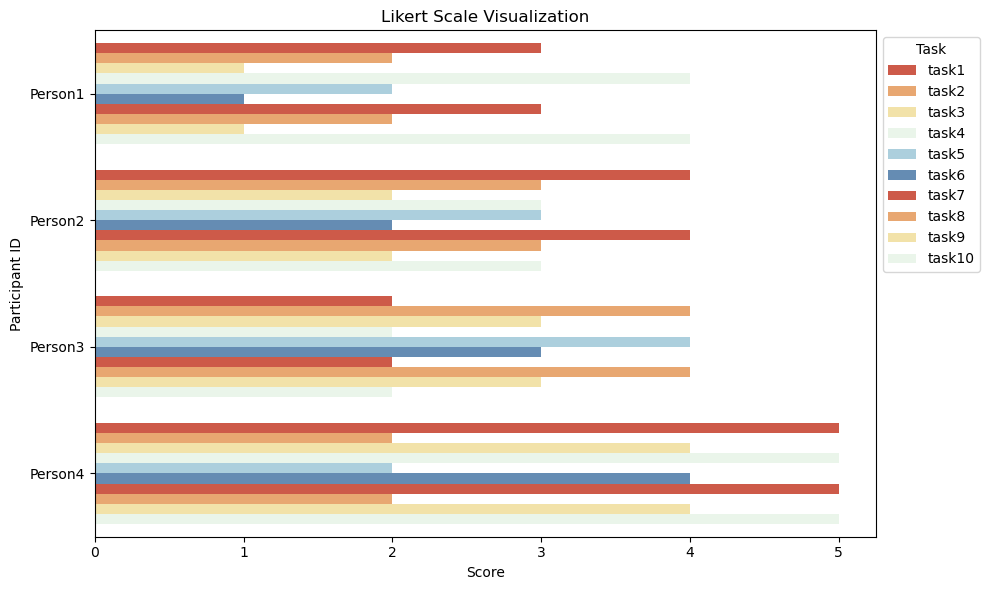

In [71]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Sample data (replace this with your actual data)
data = {
    'id': ['Person1', 'Person2', 'Person3', 'Person4'],
    'task1': [3, 4, 2, 5],
    'task2': [2, 3, 4, 2],
    'task3': [1, 2, 3, 4],
    'task4': [4, 3, 2, 5],
    'task5': [2, 3, 4, 2],
    'task6': [1, 2, 3, 4],
    'task7': [3, 4, 2, 5],
    'task8': [2, 3, 4, 2],
    'task9': [1, 2, 3, 4],
    'task10': [4, 3, 2, 5]
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Melt the DataFrame to have 'id' and 'task' as identifiers
melted_df = df.melt(id_vars='id', var_name='task', value_name='score')

# Define Likert scale colors
likert_colors = sns.color_palette("RdYlBu", 6)

# Create the stacked horizontal bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=melted_df, x='score', y='id', hue='task', palette=likert_colors, orient='h')
plt.xlabel('Score')
plt.ylabel('Participant ID')
plt.title('Likert Scale Visualization')
plt.legend(title='Task', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()
